## 1. 데이터 확인

### 필수 라이브러리

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # 경고 메세지 무시

In [14]:
df_train_origin = pd.read_csv("./data/train.csv") # 학습용 데이터
df_test_origin = pd.read_csv("./data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [15]:
df_train_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

## 2. 데이터 전처리

### 각 변수별 확인

In [16]:
df_train = pd.read_csv('./data/Ch2/df_train.csv')
df_test = pd.read_csv('./data/Ch2/df_test.csv')

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         59299 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            59299 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  59299 non-null  float64
 8   id_strategic_ver         59299 non-null  float64
 9   it_strategic_ver         59299 non-null  float64
 10  idit_strategic_ver       59299 non-null  float64
 11  customer_job             59299 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             59299 non-null  object 
 14  product_category      

## 3. 피처엔지니어링

### 레이블 인코딩

In [4438]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

# df_train과 df_test를 복사하여 새로운 데이터프레임을 생성
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# 레이블 인코딩 적용
for col in label_columns:
    encoder = LabelEncoder()
    combined_data = pd.concat([df_train_encoded[col], df_test_encoded[col]])
    encoder.fit(combined_data)
    df_train_encoded[col] = encoder.transform(df_train_encoded[col])
    df_test_encoded[col] = encoder.transform(df_test_encoded[col])


변수 ' 3. com_reg_ver_win_rate ' 에 대한 결측치 처리

In [4439]:
from sklearn.ensemble import RandomForestRegressor

def fill_missing_values(df):
    # 데이터에서 결측치가 없는 행과 결측치가 있는 행 분리
    train_data = df[df['com_reg_ver_win_rate'].notna()]
    test_data = df[df['com_reg_ver_win_rate'].isna()]

    # 'com_reg_ver_win_rate'를 예측하는 데 사용할 피처 선택
    features = ['business_area', 'business_unit', 'customer_country.1']   

    # 훈련 데이터와 테스트 데이터 준비
    X_train = train_data[features]
    y_train = train_data['com_reg_ver_win_rate']
    X_test = test_data[features]

    # 랜덤 포레스트 모델 생성 및 훈련
    model = RandomForestRegressor(random_state=0)
    model.fit(X_train, y_train)

    # 모델을 사용해 결측치 예측
    predicted_values = model.predict(X_test)

    # 예측값으로 결측치 대체
    df.loc[df['com_reg_ver_win_rate'].isna(), 'com_reg_ver_win_rate'] = predicted_values


# df_train_encoded에 대한 데이터 처리
fill_missing_values(df_train_encoded)

# df_test_encoded에 대한 데이터 처리
fill_missing_values(df_test_encoded)


In [4440]:
print(df_test_encoded['com_reg_ver_win_rate'].isnull().sum())

0


In [4441]:
# 결측값 0값으로 대체
df_train_encoded['com_reg_ver_win_rate'].fillna(0, inplace=True)
df_test_encoded['com_reg_ver_win_rate'].fillna(0, inplace=True)

print(df_train_encoded['com_reg_ver_win_rate'].isnull().sum())

0


In [4442]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   int32  
 3   business_unit            5271 non-null   int32  
 4   com_reg_ver_win_rate     5271 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            5271 non-null   int32  
 7   enterprise               5271 non-null   int32  
 8   historical_existing_cnt  5271 non-null   float64
 9   id_strategic_ver         5271 non-null   float64
 10  it_strategic_ver         5271 non-null   float64
 11  idit_strategic_ver       5271 non-null   float64
 12  customer_job             5271 non-null   int32  
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

### 파생변수 생성

In [4443]:
# 변수 'customerver_cus_business_area_type_weight' 생성
df_train_encoded['ver_cus_business_area'] = df_train_encoded['ver_cus'] * df_train_encoded['business_area']
df_test_encoded['ver_cus_business_area'] = df_test_encoded['ver_cus'] * df_test_encoded['business_area']

# 변수 'ver_pro_product_category' 생성
df_train_encoded['ver_pro_product_category'] = df_train_encoded['ver_pro'] * df_train_encoded['product_category']
df_test_encoded['ver_pro_product_category'] = df_test_encoded['ver_pro'] * df_test_encoded['product_category']

# 변수 'id_business_area' 생성
df_train_encoded['id_business_area'] = df_train_encoded['id_strategic_ver'] * df_train_encoded['business_area'] * df_train_encoded['business_unit']
df_test_encoded['id_business_area'] = df_test_encoded['id_strategic_ver'] * df_test_encoded['business_area'] * df_test_encoded['business_unit']

# 변수 'it_business_area' 생성
df_train_encoded['it_business_area'] = df_train_encoded['it_strategic_ver'] * df_train_encoded['business_area'] * df_train_encoded['business_unit']
df_test_encoded['it_business_area'] = df_test_encoded['it_strategic_ver'] * df_test_encoded['business_area'] * df_test_encoded['business_unit']

# 변수 'idit_business_area' 생성
df_train_encoded['idit_business_area'] = df_train_encoded['idit_strategic_ver'] * df_train_encoded['business_subarea']
df_test_encoded['idit_business_area'] = df_test_encoded['idit_strategic_ver'] * df_train_encoded['business_subarea']


# 변수 'com_sub_area' 생성
df_train_encoded['com_sub_area'] = df_train_encoded['business_area'] * df_train_encoded['business_subarea']
df_test_encoded['com_sub_area'] = df_test_encoded['business_area'] * df_test_encoded['business_subarea']

# # 변수 'com_sub_product' 생성
# df_train_encoded['com_sub_product'] = df_train_encoded['product_category'] * df_train_encoded['product_subcategory']
# df_test_encoded['com_sub_product'] = df_test_encoded['product_category'] * df_test_encoded['product_subcategory']


In [4444]:
df_train_encoded = df_train_encoded.drop(['ver_cus', 'ver_pro', 'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver'], axis=1)
df_test_encoded = df_test_encoded.drop(['ver_cus', 'ver_pro', 'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver'], axis=1)

In [4445]:
df_train_encoded = df_train_encoded.drop(['business_unit', 'business_area', 'business_subarea', 'product_subcategory'], axis=1)
df_test_encoded = df_test_encoded.drop(['business_unit', 'business_area', 'business_subarea', 'product_subcategory'], axis=1)

### 변수중요도

In [4446]:
import xgboost as xgb
import pandas as pd

# 데이터셋을 훈련 세트와 테스트 세트로 나누기
X = df_train_encoded.drop(columns=['is_converted'])
y = df_train_encoded['is_converted']

# 80%를 훈련 세트로, 20%를 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 데이터셋 준비
dtrain = xgb.DMatrix(X_train, label=y_train)
param = {'max_depth': 6, 'learning_rate': 0.03}
num_round = 200
bst = xgb.train(param, dtrain, num_round)

# 특성 중요도 확인
feature_importance = bst.get_score(importance_type='gain')

# 특성 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index', columns=['Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.to_string())


                          Importance
customer_idx               22.583523
customer_type               2.953728
ver_win_rate_x              2.703543
lead_owner                  2.519918
customer_country.1          1.846144
ver_win_ratio_per_bu        1.788289
response_corporate          1.514861
bant_submit                 1.431609
com_sub_area                1.271162
lead_desc_length            1.221043
com_reg_ver_win_rate        1.159648
enterprise                  1.046260
idit_business_area          1.038008
historical_existing_cnt     0.998388
expected_timeline           0.980987
customer_country            0.924266
ver_cus_business_area       0.915887
product_category            0.820725
id_business_area            0.768230
product_modelname           0.635680
customer_position           0.549993
customer_job                0.542033
ver_pro_product_category    0.509424
inquiry_type                0.429764
it_business_area            0.149744


### 상관관계 히트맵

In [4447]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bant_submit               59299 non-null  float64
 1   customer_country          59299 non-null  int32  
 2   com_reg_ver_win_rate      59299 non-null  float64
 3   customer_idx              59299 non-null  int64  
 4   customer_type             59299 non-null  int32  
 5   enterprise                59299 non-null  int32  
 6   historical_existing_cnt   59299 non-null  float64
 7   customer_job              59299 non-null  int32  
 8   lead_desc_length          59299 non-null  int64  
 9   inquiry_type              59299 non-null  int32  
 10  product_category          59299 non-null  int32  
 11  product_modelname         59299 non-null  int32  
 12  customer_country.1        59299 non-null  int32  
 13  customer_position         59299 non-null  int32  
 14  respon

In [4448]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        5271 non-null   int64  
 1   bant_submit               5271 non-null   float64
 2   customer_country          5271 non-null   int32  
 3   com_reg_ver_win_rate      5271 non-null   float64
 4   customer_idx              5271 non-null   int64  
 5   customer_type             5271 non-null   int32  
 6   enterprise                5271 non-null   int32  
 7   historical_existing_cnt   5271 non-null   float64
 8   customer_job              5271 non-null   int32  
 9   lead_desc_length          5271 non-null   int64  
 10  inquiry_type              5271 non-null   int32  
 11  product_category          5271 non-null   int32  
 12  product_modelname         5271 non-null   int32  
 13  customer_country.1        5271 non-null   int32  
 14  customer

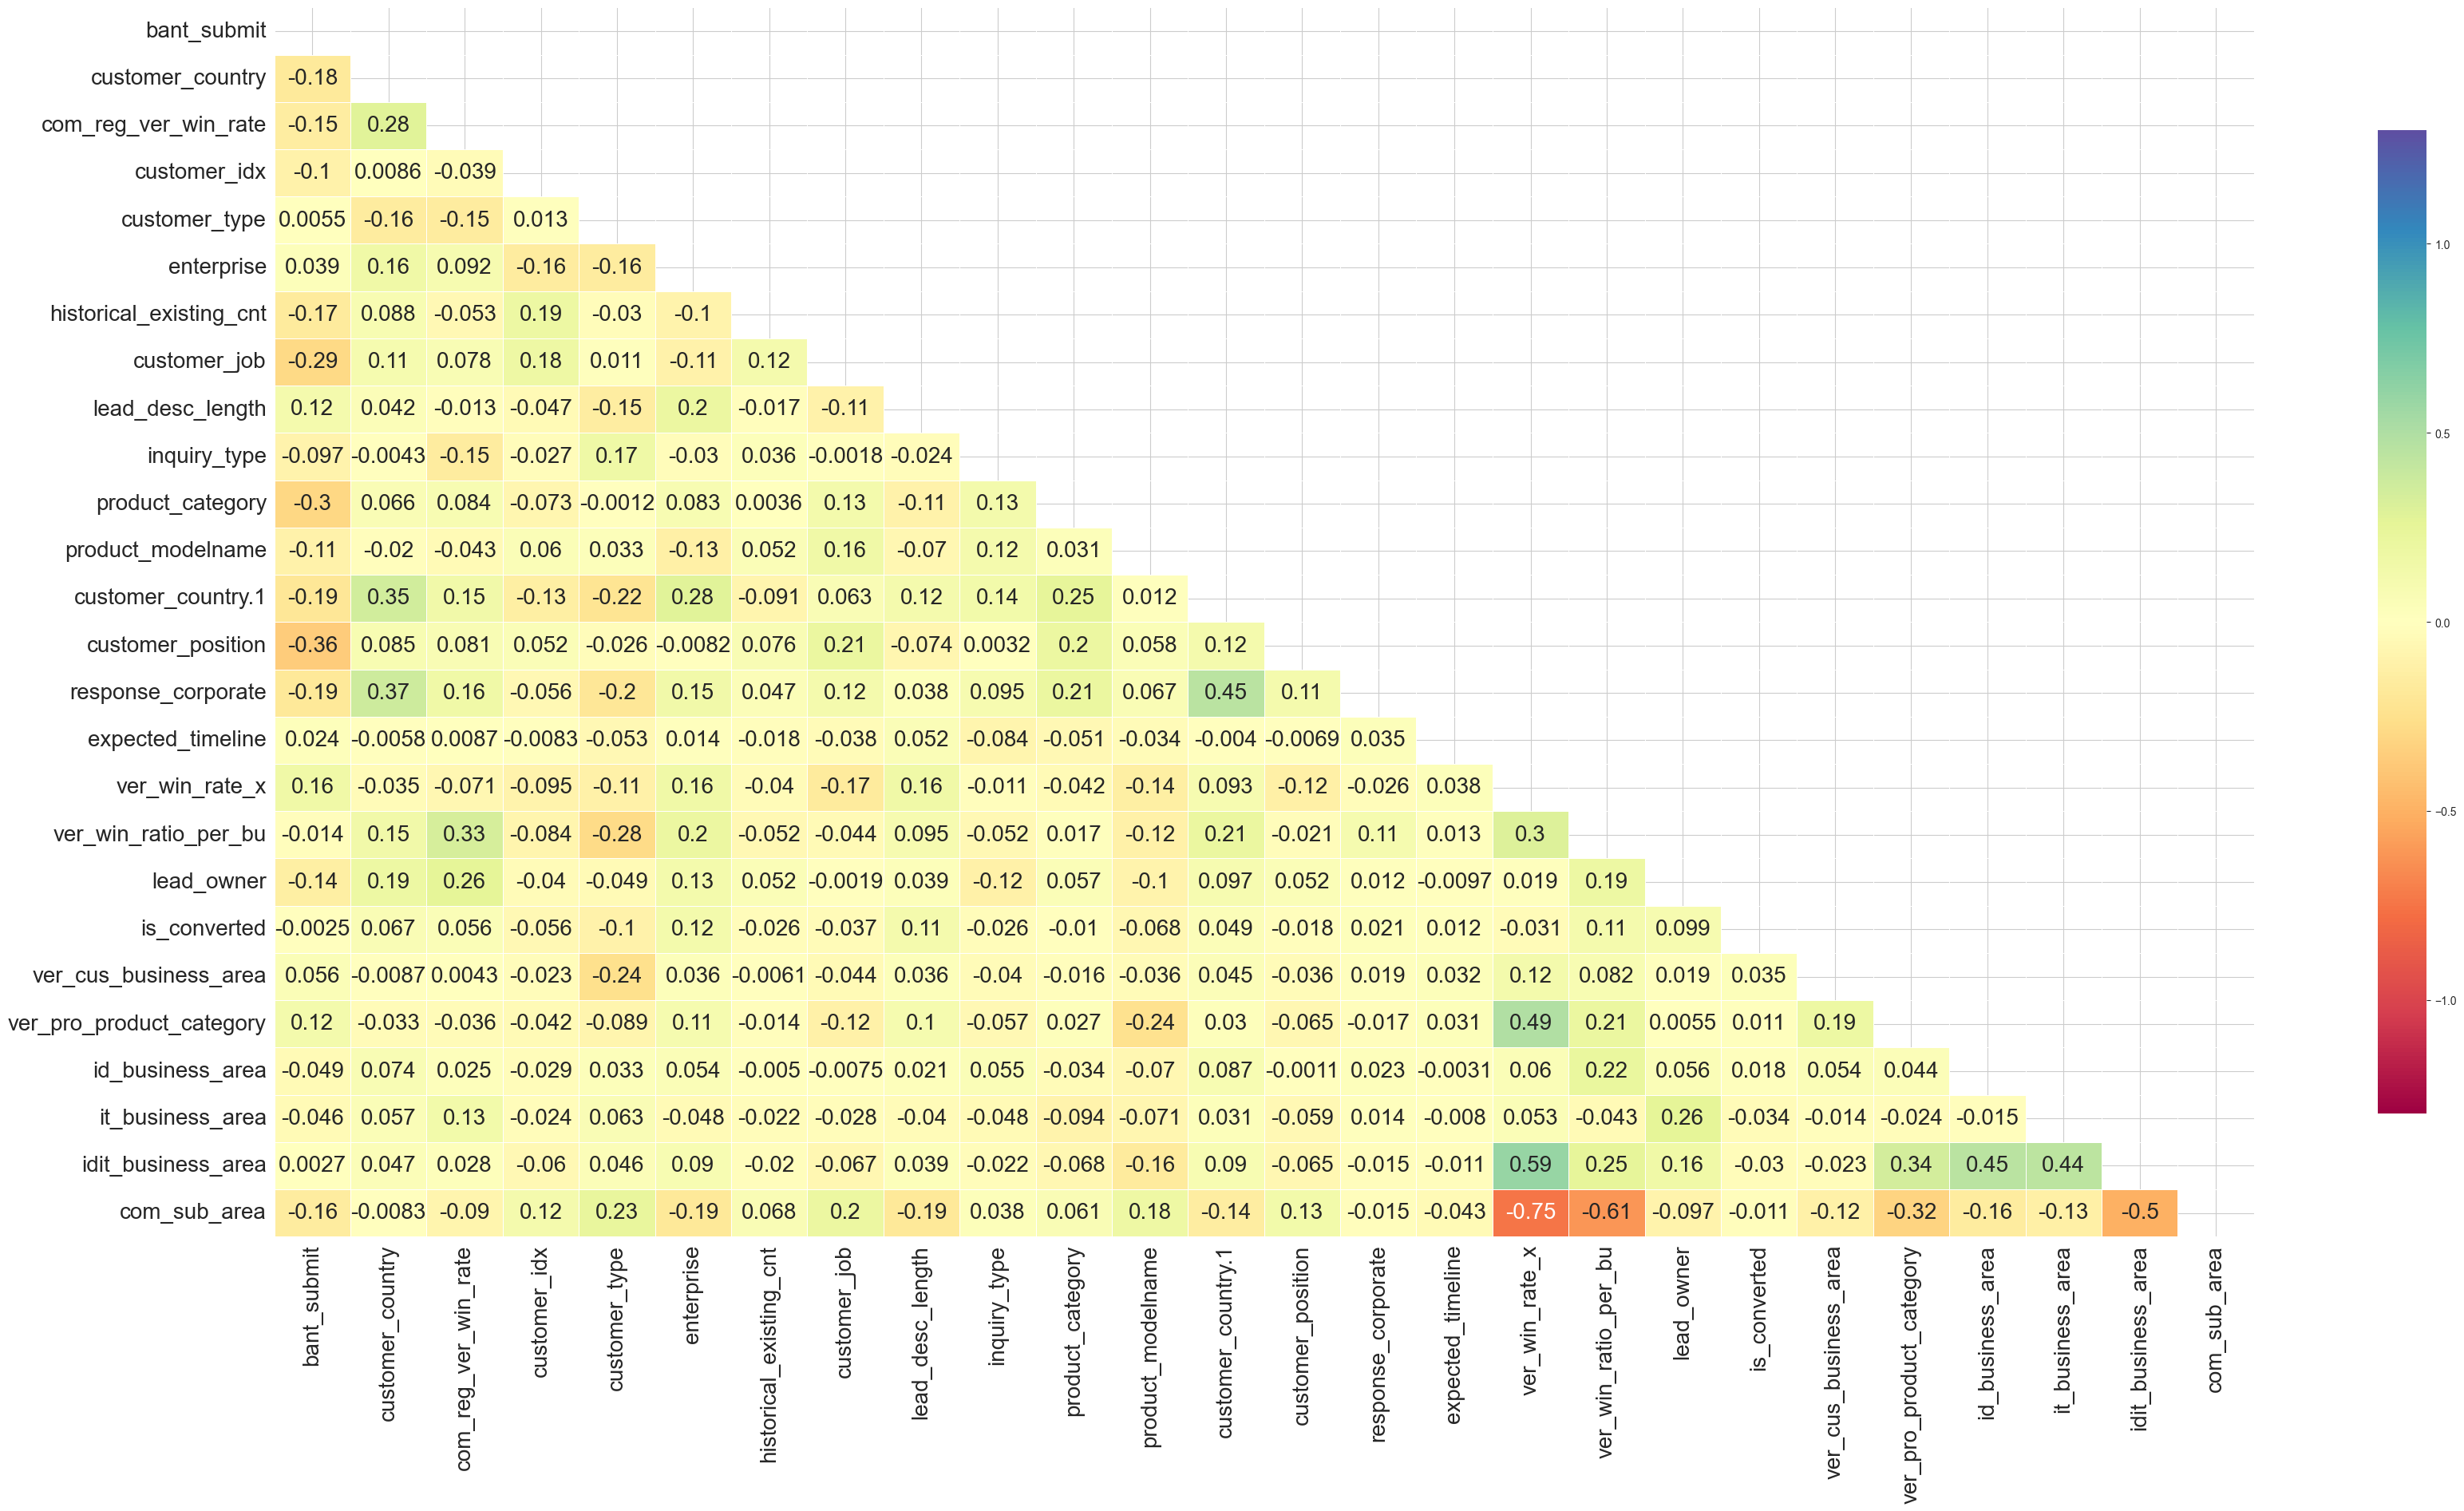

In [4449]:
import numpy as np

# 숫자형 변수들 간의 상관관계 계산
corr = df_train_encoded.corr()

# 상관계수 행렬의 상삼각행렬을 마스킹하기 위한 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵
plt.figure(figsize=(40, 20))

sns.heatmap(corr,
            mask=mask, # 마스크 적용
            annot=True, # 수치(상관관계) 표시
            annot_kws = {'size':20}, # 수치표시 사이즈
            cmap='Spectral', # 색상 변경
            vmin=-1.3, # 색상 팔레트 범위
            vmax=1.3,
            linewidths=.5, # 히트맵의 선 스타일 변경
            cbar_kws={"shrink": .8}) # 히트맵 주변에 색상 바 추가(사이즈 조절 가능)

# 변수 이름의 크기 조절
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


In [4450]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                  features
0     6.410056               bant_submit
1     5.448139          customer_country
2     1.861309      com_reg_ver_win_rate
3     4.706028              customer_idx
4    10.003590             customer_type
5     1.901274                enterprise
6     1.160712   historical_existing_cnt
7     5.609318              customer_job
8     1.506076          lead_desc_length
9    13.620102              inquiry_type
10    7.572162          product_category
11   21.080668         product_modelname
12    3.652262        customer_country.1
13    5.662857         customer_position
14    8.401482        response_corporate
15    7.405313         expected_timeline
16    4.585927            ver_win_rate_x
17    2.395714      ver_win_ratio_per_bu
18    2.795330                lead_owner
19    1.166492     ver_cus_business_area
20    1.575789  ver_pro_product_category
21    1.770096          id_business_area
22    1.870246          it_business_area
23    3.954373  

In [4451]:
df_train_encoded = df_train_encoded.drop(['com_sub_area'], axis=1)
df_test_encoded = df_test_encoded.drop(['com_sub_area'], axis=1)

In [4452]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                  features
0     6.191911               bant_submit
1     5.366912          customer_country
2     1.856919      com_reg_ver_win_rate
3     4.638200              customer_idx
4     9.448107             customer_type
5     1.896806                enterprise
6     1.160685   historical_existing_cnt
7     5.479486              customer_job
8     1.504002          lead_desc_length
9    13.341814              inquiry_type
10    7.485522          product_category
11   19.189818         product_modelname
12    3.648760        customer_country.1
13    5.549237         customer_position
14    8.359622        response_corporate
15    7.259854         expected_timeline
16    2.943437            ver_win_rate_x
17    1.741522      ver_win_ratio_per_bu
18    2.760421                lead_owner
19    1.164502     ver_cus_business_area
20    1.528634  ver_pro_product_category
21    1.757664          id_business_area
22    1.808372          it_business_area
23    3.940895  

In [4453]:
df_train_encoded = df_train_encoded.drop(['product_modelname'], axis=1)
df_test_encoded = df_test_encoded.drop(['product_modelname'], axis=1)

In [4454]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                  features
0     5.746340               bant_submit
1     5.360512          customer_country
2     1.855831      com_reg_ver_win_rate
3     4.536509              customer_idx
4     9.162144             customer_type
5     1.893659                enterprise
6     1.160237   historical_existing_cnt
7     5.251167              customer_job
8     1.503160          lead_desc_length
9    12.373402              inquiry_type
10    7.376761          product_category
11    3.648611        customer_country.1
12    5.432076         customer_position
13    8.205596        response_corporate
14    7.080680         expected_timeline
15    2.935575            ver_win_rate_x
16    1.741519      ver_win_ratio_per_bu
17    2.756999                lead_owner
18    1.161086     ver_cus_business_area
19    1.483974  ver_pro_product_category
20    1.755904          id_business_area
21    1.807911          it_business_area
22    3.938394        idit_business_area


In [4455]:
df_train_encoded = df_train_encoded.drop(['inquiry_type'], axis=1)
df_test_encoded = df_test_encoded.drop(['inquiry_type'], axis=1)

In [4456]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                  features
0     5.518976               bant_submit
1     5.348296          customer_country
2     1.830738      com_reg_ver_win_rate
3     4.487732              customer_idx
4     7.883246             customer_type
5     1.893195                enterprise
6     1.156594   historical_existing_cnt
7     5.234699              customer_job
8     1.500644          lead_desc_length
9     7.037970          product_category
10    3.583368        customer_country.1
11    5.387364         customer_position
12    8.029432        response_corporate
13    7.042834         expected_timeline
14    2.921293            ver_win_rate_x
15    1.734749      ver_win_ratio_per_bu
16    2.753289                lead_owner
17    1.159300     ver_cus_business_area
18    1.478150  ver_pro_product_category
19    1.749553          id_business_area
20    1.806264          it_business_area
21    3.925534        idit_business_area


### 최종적으로 선정된 변수

In [4457]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bant_submit               59299 non-null  float64
 1   customer_country          59299 non-null  int32  
 2   com_reg_ver_win_rate      59299 non-null  float64
 3   customer_idx              59299 non-null  int64  
 4   customer_type             59299 non-null  int32  
 5   enterprise                59299 non-null  int32  
 6   historical_existing_cnt   59299 non-null  float64
 7   customer_job              59299 non-null  int32  
 8   lead_desc_length          59299 non-null  int64  
 9   product_category          59299 non-null  int32  
 10  customer_country.1        59299 non-null  int32  
 11  customer_position         59299 non-null  int32  
 12  response_corporate        59299 non-null  int32  
 13  expected_timeline         59299 non-null  int32  
 14  ver_wi

In [4458]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        5271 non-null   int64  
 1   bant_submit               5271 non-null   float64
 2   customer_country          5271 non-null   int32  
 3   com_reg_ver_win_rate      5271 non-null   float64
 4   customer_idx              5271 non-null   int64  
 5   customer_type             5271 non-null   int32  
 6   enterprise                5271 non-null   int32  
 7   historical_existing_cnt   5271 non-null   float64
 8   customer_job              5271 non-null   int32  
 9   lead_desc_length          5271 non-null   int64  
 10  product_category          5271 non-null   int32  
 11  customer_country.1        5271 non-null   int32  
 12  customer_position         5271 non-null   int32  
 13  response_corporate        5271 non-null   int32  
 14  expected

### 2-2. 학습, 검증 데이터 분리

In [4459]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train_encoded.drop("is_converted", axis=1),
    df_train_encoded["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## 3. 모델 학습

단일모델 기준으로 사용할수 있는 모델들 라이브러리 불러오는 코드에 작성해둠

### 모델 라이브러리

In [4460]:
# 모델 라이브러리
## 단일모델로는 이와같은 모델정도 있으니깐 참고
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# 보팅
from sklearn.ensemble import VotingClassifier

# 스테킹
from sklearn.ensemble import StackingClassifier

### 최적 하이퍼 파라미터 찾기

optuna를 통한 최적의 파라미터 찾기

다시한번 optuna를 통한 최적의 파라미터 찾는과정

### 모델 정의

In [4461]:
### 단일 모델 ###

# LightGBM
model = LGBMClassifier(
    num_leaves=106
    , max_depth=19
    , n_estimators=409
    , learning_rate=0.06987263978834855
    , min_child_samples=27
    , verbose = -1
)


### 모델 학습

In [4462]:
model.fit(x_train, y_train)

LGBMClassifier(learning_rate=0.06987263978834855, max_depth=19,
               min_child_samples=27, n_estimators=409, num_leaves=106,
               verbose=-1)

### 모델 성능 보기

In [4464]:
import pandas as pd

def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])
    micro_F1 = f1_score(y_test, y_pred, average='micro')  # 추가된 부분

    metrics = pd.DataFrame({
        '정확도': [accuracy],
        '정밀도': [precision],
        '재현율': [recall],
        'F1 Score': [F1],
        'Micro F1': [micro_F1]  # 추가된 부분
    })

    confusion_df = pd.DataFrame(confusion, index=['True', 'False'], columns=['True', 'False'])

    print("\n오차행렬:")
    display(confusion_df)
    print("평가 지표:")
    display(metrics)


In [4465]:
pred = model.predict(x_val)
get_clf_eval(y_val, pred)


오차행렬:


,True,False
True,741,206
False,64,10849


평가 지표:


,정확도,정밀도,재현율,F1 Score,Micro F1
0,0.977234,0.920497,0.782471,0.84589,0.977234


## 4. 제출하기

### 테스트 데이터 예측

In [4466]:
# 예측에 필요한 데이터 분리
x_test = df_test_encoded.drop(["is_converted", "id"], axis=1)

In [4467]:
test_pred = model.predict(x_test)
sum(test_pred) # True로 예측된 개수

444

### 제출 파일 작성

In [4468]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission_ver9.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**